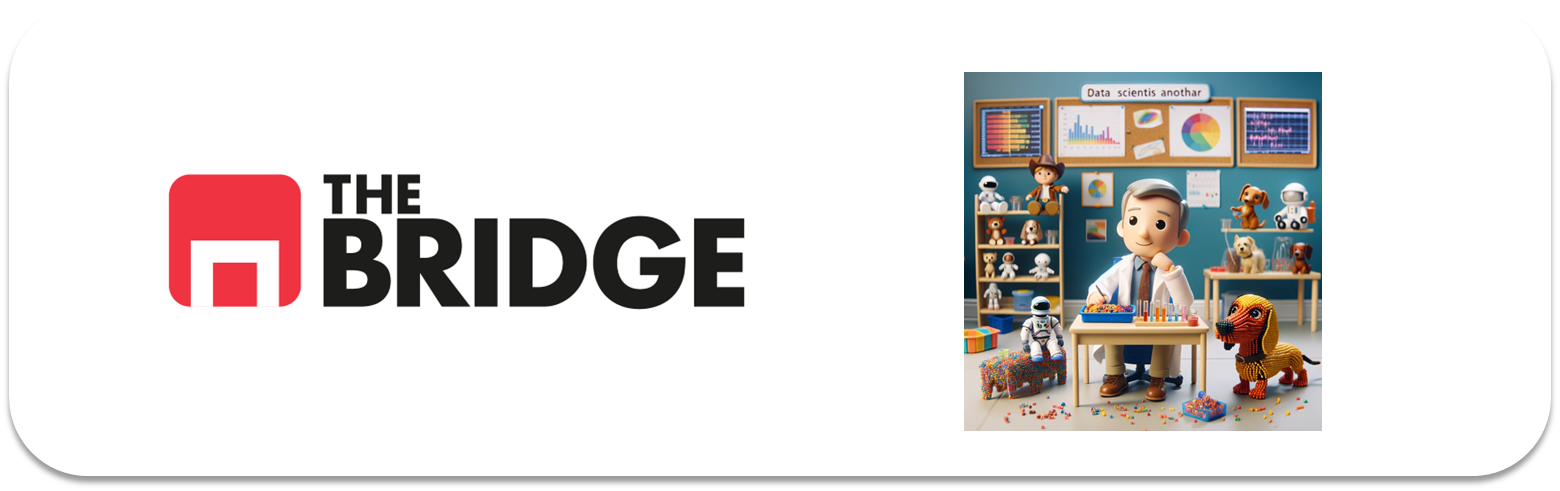

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")


In [2]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()
df_t = sns.load_dataset("titanic")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_t.tail(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df_t.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [6]:
porcentaje_nulos = df_t.isna().mean()*100

In [7]:
porcentaje_nulos

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
total_nulos = df_t.isna().sum().sum()
total_elementos = df_t.size
porcentaje_total_nulos = (total_nulos/total_elementos)* 100

In [9]:
print(f"Porcentaje de nulos del dataset: {porcentaje_total_nulos:.2f}%")

Porcentaje de nulos del dataset: 6.50%


In [10]:
df_t_copy = df_t.copy()

In [11]:
df_t_copy["age"] = df_t_copy["age"].fillna(df_t_copy["age"].mean())
df_t_copy["embarked"] = df_t_copy["embarked"].fillna(df_t_copy["embarked"].mode()[0])
df_t_copy["embark_town"] = df_t_copy["embark_town"].fillna(df_t_copy["embark_town"].mode()[0])

In [12]:
df_t_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df_t_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df_t_2 = df_t.drop(columns=["parch","deck"])
df_t_2

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



| Columna/Variable | Descripción |
| ---------------- | ----------- |
|     `survive`    |  Si sobrevivio o no y se indica  con  0 = False y 1 = True |
|     `pclass`     |  Tipo de clase a la que pertenece el pasajero ('1' ,'2' ,'3' )  | 
|     `sex`        | Al sexo que pertenece (masculino = male) (femenino = female) |
|      `age`       | Edad del pasajero |
|     `sibsp`      | Familiares que viajan con el pasajero |
|      `fare`      | Precio del ticket de viaje  |
|    `embarked`    | Donde embarco cada pasajero (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) |
|   `class`        | Clase a la que pertenece el pasajero en modo de texto(first,second,third) |
|       `who`      |  Grupo da la que pertenece (Man,Woman,Child)  |
|   `adult_male`   | si es un hombre adulto |
|  `emark_town`    | Ciudad en la que embarcó el pasajero   |
|   `alive`        | si sigue vivo o no |
|   `alone`        | Indica si el pasajero viajo solo o en compañia |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [15]:
# no entiendo muy que hacer las ciudades q visito fueron Cherbourg en francia, queenstown en irlanda y Southampton

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [16]:
from bootcampviztools import pinta_distribucion_categoricas,plot_categorical_relationship_fin,plot_categorical_numerical_relationship,plot_combined_graphs,plot_grouped_boxplots,plot_grouped_histograms,grafico_dispersion_con_correlacion,bubble_plot

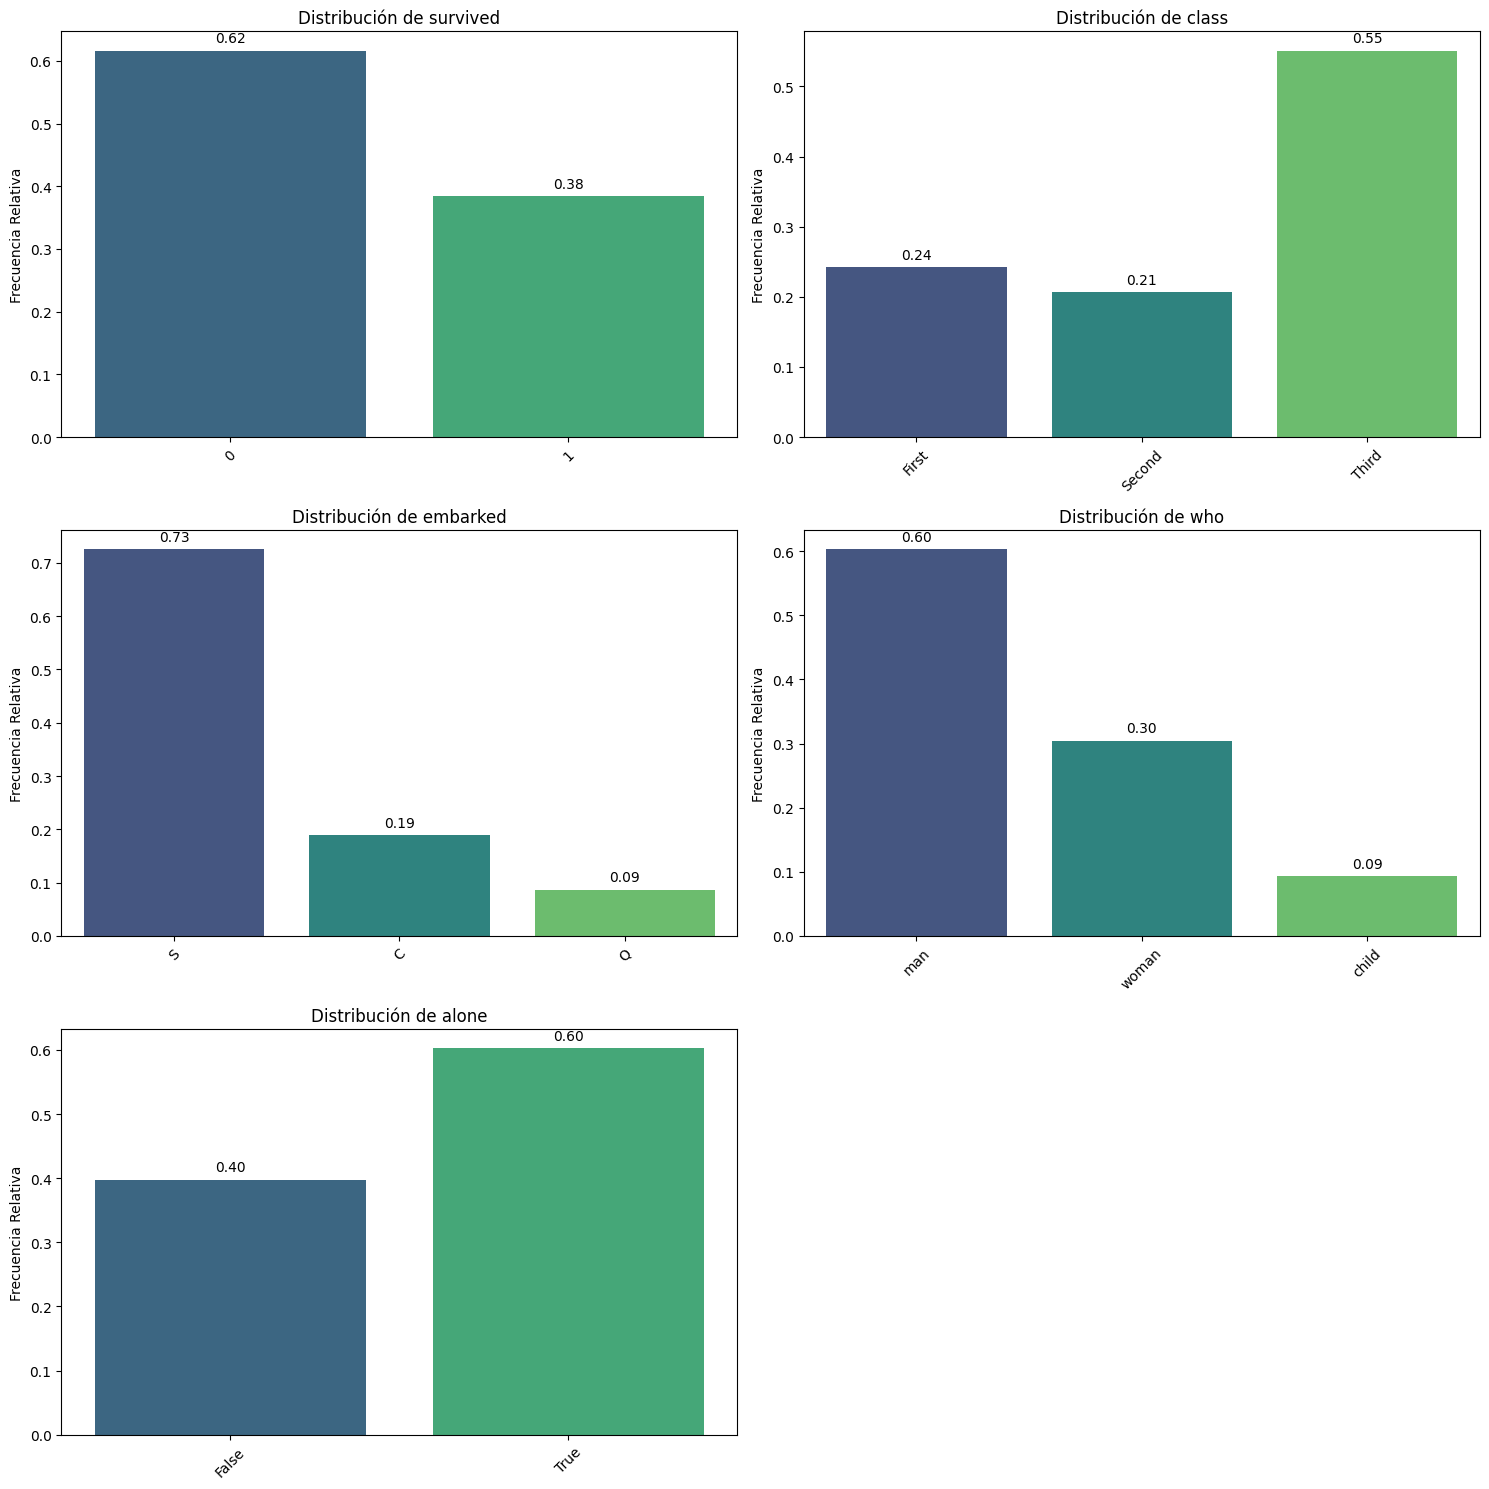

In [17]:
columnas_categoricas = ['survived', 'class', 'embarked', 'who', 'alone']
pinta_distribucion_categoricas(df_t_copy, columnas_categoricas, relativa=True, mostrar_valores=True)

c:\Users\marco\OneDrive\Documentos\github desktop\Online_DS_THEBRIDGE_Marco\sprint 7\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


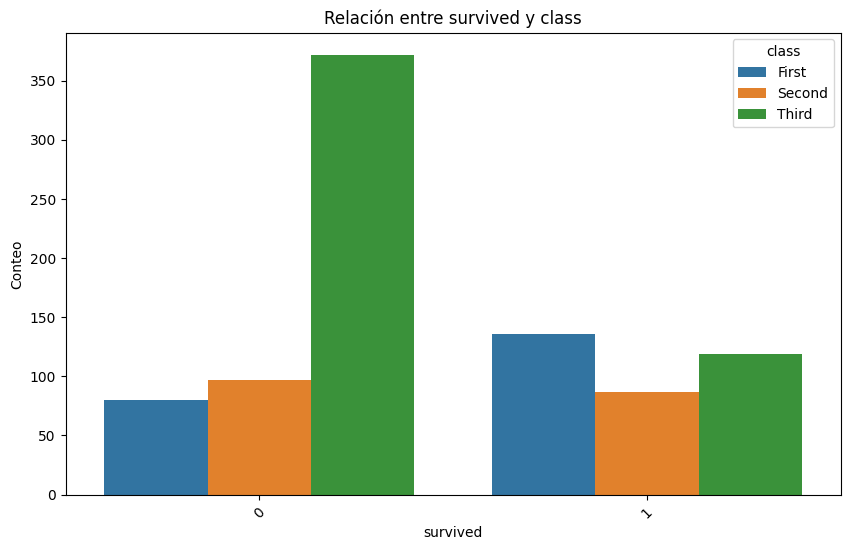

In [18]:
plot_categorical_relationship_fin(df_t_copy, cat_col1= "survived", cat_col2= "class", relative_freq=False,show_values=False,size_group=5)

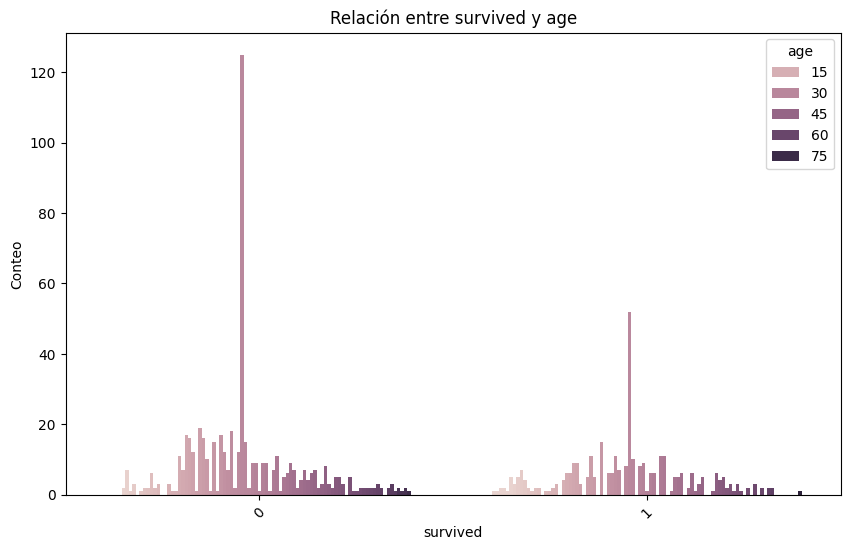

In [19]:
plot_categorical_relationship_fin(df_t_copy, cat_col1= "survived", cat_col2= "age", relative_freq=False,show_values=False,size_group=5)

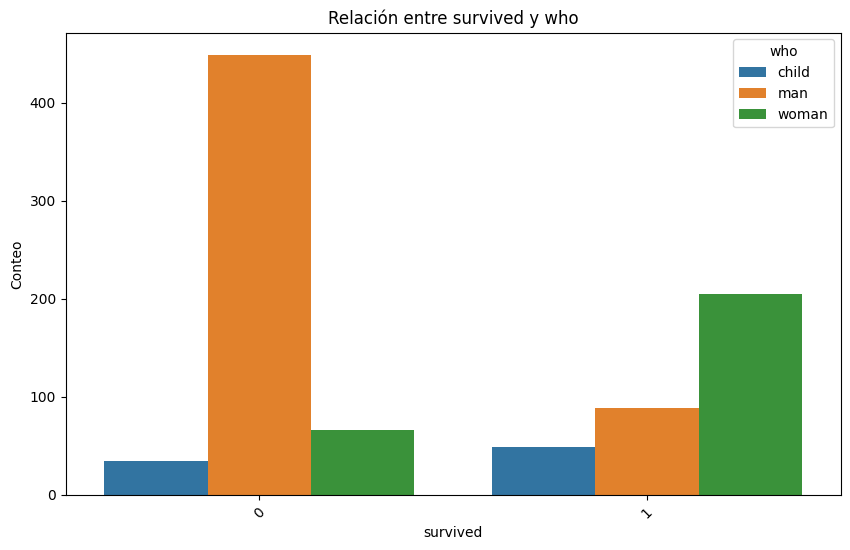

In [20]:
plot_categorical_relationship_fin(df_t_copy, cat_col1= "survived", cat_col2= "who", relative_freq=False,show_values=False,size_group=5)

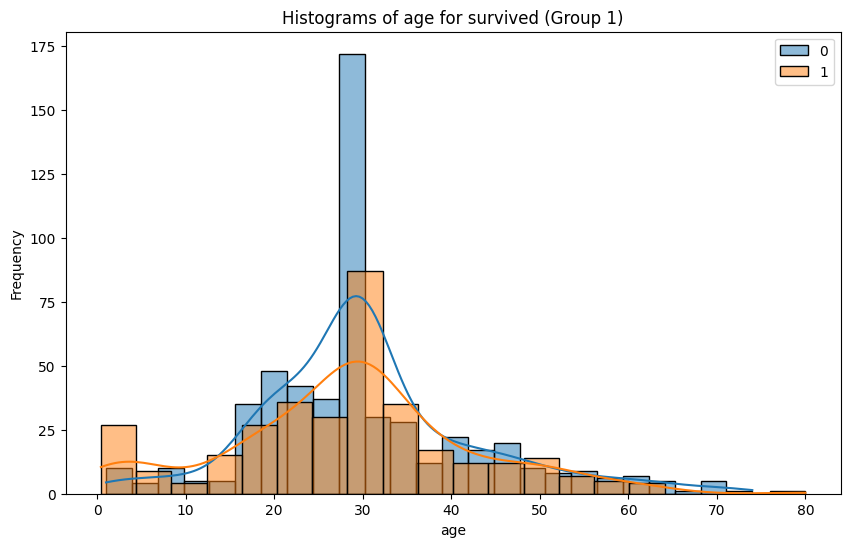

In [21]:
plot_grouped_histograms(df_t_copy, cat_col= "survived", num_col= "age", group_size=5)

### #2.2 Numéricas

(2, 2)


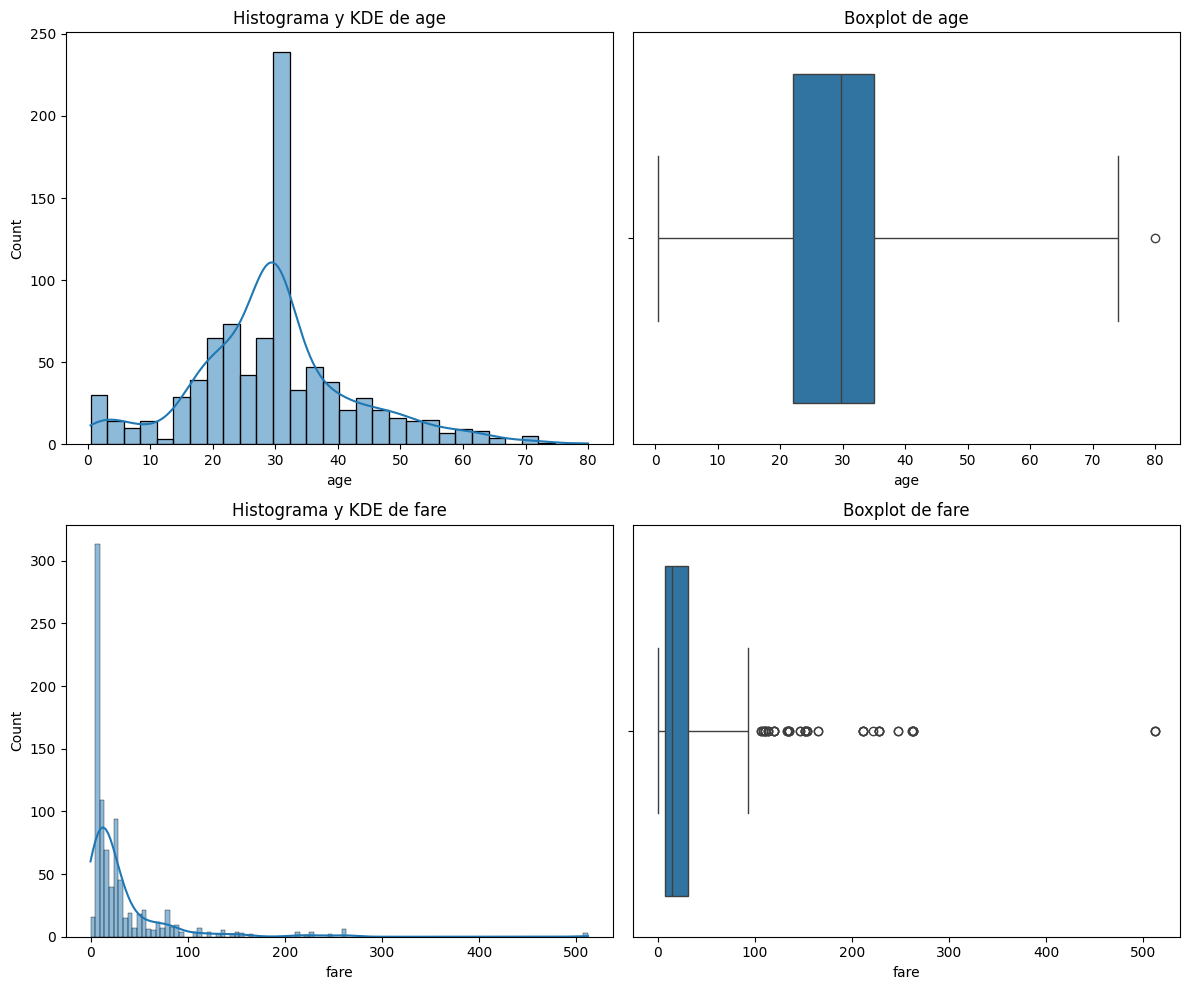

In [22]:
columnas_numericas = ['age','fare']
plot_combined_graphs(df_t_copy, columnas_numericas, whisker_width= 3)


(2, 2)


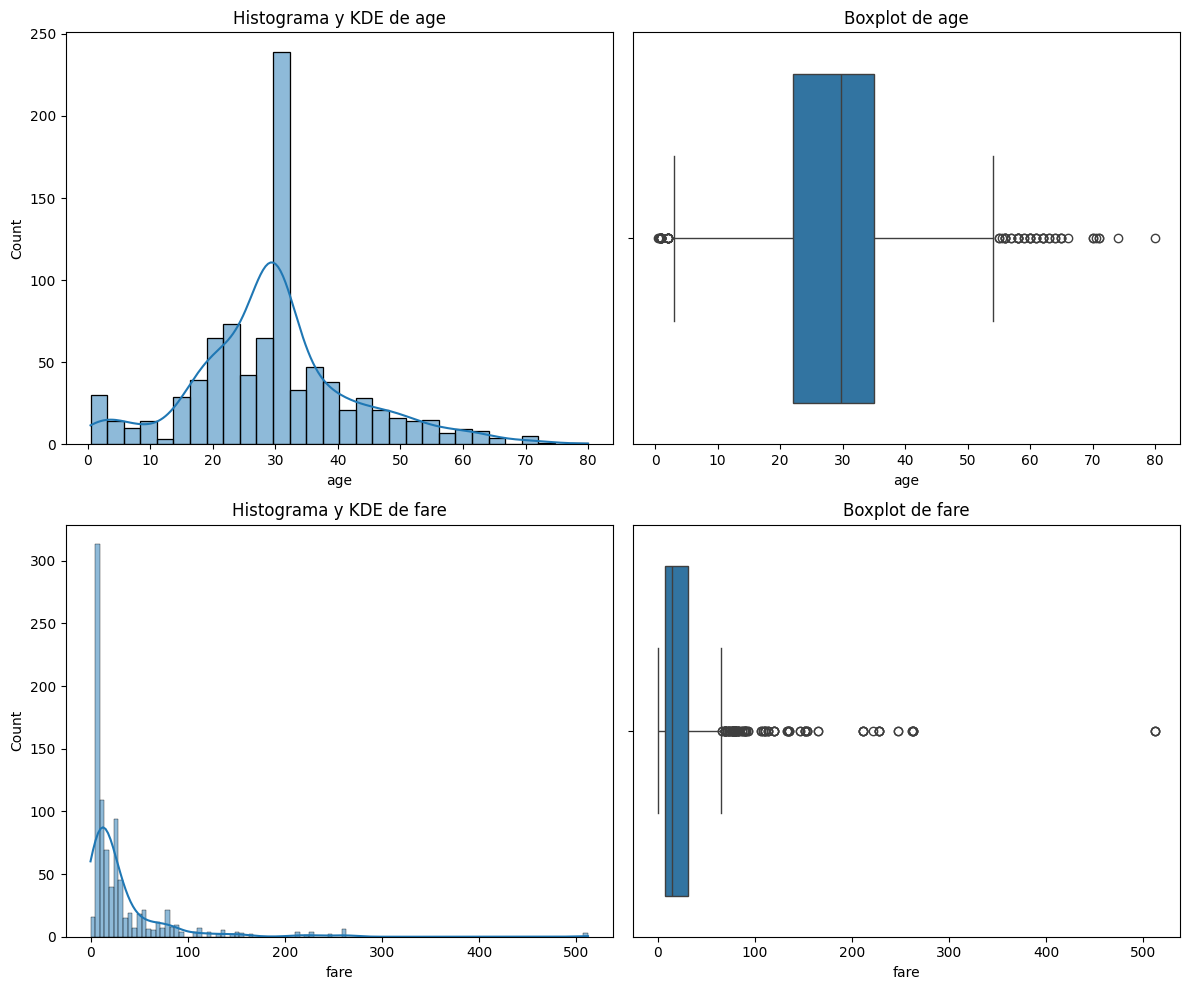

In [23]:
plot_combined_graphs(df_t_copy,columnas_numericas)